In [2]:
import pandas as pd
import pickle as pkl
from rdkit import Chem
from ogb.utils import smiles2graph


In [3]:
shard_path = "data/pm6_raw/pm6_processed_01.parquet"
df = pd.read_parquet(shard_path)
df = df.rename(columns={"ordered_smiles": "smi"})

In [8]:
row = df.iloc[11]
smi = row.smi if hasattr(row, "smi") else row["smi"]
dg = smiles2graph(smi)
dg


{'edge_index': array([[ 0,  1,  1,  2,  1,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
          8,  9,  8, 10,  5, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16,
         16, 17, 17, 18, 17, 19, 19, 20, 13, 21, 21, 22, 22, 23, 23, 24,
         24, 25, 25, 26, 25, 27, 22, 11, 20, 14, 27, 21],
        [ 1,  0,  2,  1,  3,  1,  4,  3,  5,  4,  6,  5,  7,  6,  8,  7,
          9,  8, 10,  8, 11,  5, 12, 11, 13, 12, 14, 13, 15, 14, 16, 15,
         17, 16, 18, 17, 19, 17, 20, 19, 21, 13, 22, 21, 23, 22, 24, 23,
         25, 24, 26, 25, 27, 25, 11, 22, 14, 20, 21, 27]]),
 'edge_feat': array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 1],
        [0, 0, 1],

In [2]:
# load_from = "/fs/home/banaszewski/pool-banaszewski/LibMTL/examples/tdc/data/pm6_processed/pm6_processed_20.pt"
# pm6_df = pd.read_parquet('data/pm6/pm6_processed_01.parquet')
# blob = torch.load(load_from, map_location="cpu")


load_from = "/fs/home/banaszewski/pool-banaszewski/LibMTL/examples/tdc/data/pm6_processed/shard_75.pkl"
with open(load_from, 'rb') as f:
    blob = pkl.load(f)


In [3]:

target_columns = blob['label_cols']

split_idx = len(blob['graphs']) // 4

val_graphs = blob['graphs'][:split_idx]
val_targets = blob['targets'][:split_idx]
with open('data/pm6_processed/val_blob.pkl', 'wb') as f:
    pkl.dump({'graphs': val_graphs, 'targets': val_targets, 'label_cols': target_columns}, f)
print(f"{len(val_graphs)=}")

test_graphs = blob['graphs'][split_idx: split_idx * 2]
test_targets = blob['targets'][split_idx: split_idx * 2]
with open('data/pm6_processed/test_blob.pkl', 'wb') as f:
    pkl.dump({'graphs': test_graphs, 'targets': test_targets, 'label_cols': target_columns}, f)

print(f"{len(test_graphs)=}")

len(val_graphs)=275133
len(test_graphs)=275133


In [13]:
?Chem.Draw.MolToImage

Signature:
Chem.Draw.MolToImage(
    mol,
    size=(300, 300),
    kekulize=True,
    wedgeBonds=True,
    fitImage=False,
    options=None,
    canvas=None,
    **kwargs,
)
Docstring:
Returns a PIL image containing a drawing of the molecule

ARGUMENTS:

  - kekulize: run kekulization routine on input `mol` (default True)

  - size: final image size, in pixel (default (300,300))

  - wedgeBonds: draw wedge (stereo) bonds (default True)

  - highlightAtoms: list of atoms to highlight (default [])

  - highlightBonds: list of bonds to highlight (default [])

  - highlightColor: RGB color as tuple (default [1, 0, 0])

NOTE:

      use 'matplotlib.colors.to_rgb()' to convert string and
      HTML color codes into the RGB tuple representation, eg.

        from matplotlib.colors import ColorConverter
        img = Draw.MolToImage(m, highlightAtoms=[1,2], highlightColor=ColorConverter().to_rgb('aqua'))
        img.save("molecule.png")

RETURNS:

  a PIL Image object
File:      /fs/gpfs41/lv1

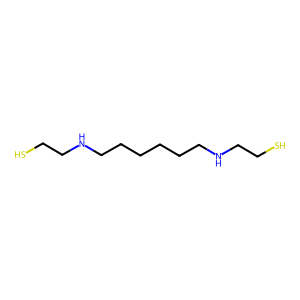

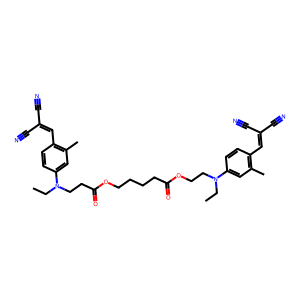

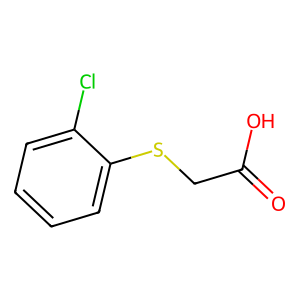

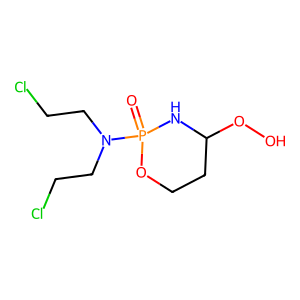

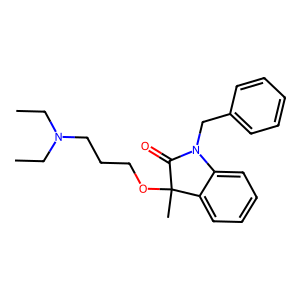

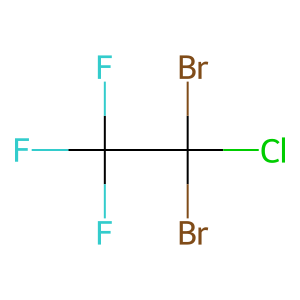

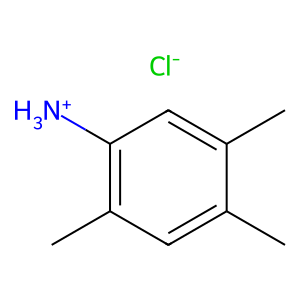

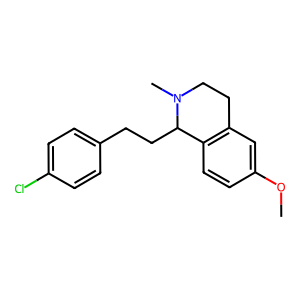

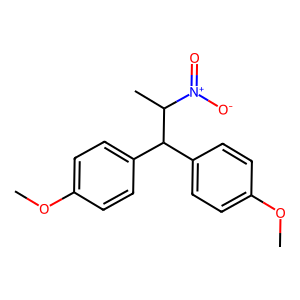

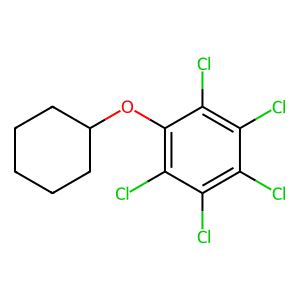

In [25]:

for i in range(10):
    mol_row = pm6_df.iloc[i]
    mol = Chem.MolFromSmiles(mol_row['ordered_smiles'])
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(0)

    display(Chem.Draw.MolToImage(mol, size=(300, 300)))
    
